###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2022  by D. Koehn, T. Meier and J. Stampa, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Digitale Signalverarbeitung: Vorbereitende Datenbearbeitung

## Kapitel 4 Übungen

### Aufgabe 4.1 

Durch Gl. (4.8) wird ein einfacher linearer Zusammenhang zwischen einer unkorrigierten, gemessenen Wertereihe $\tilde{x}_i$ und einem Referenzwertereihe $x_i$ definiert. Leiten Sie die Bestimmungsgleichung für den Faktor $a$ mit Hilfe der Methode der kleinsten Quadrate her. Interpretieren Sie das Ergebnis mit Hilfe von Korrelationsfunktionen. 

Wir setzen die Beziehung zwischen korrigierter $\hat{x}_i$ und unkorrigierter Zeitreihe $\tilde{x}_i$

\begin{equation}
\hat{x}_i = a \tilde{x}_i \tag{4.8}
\end{equation}

in die zu minimierende Zielfunktion 

\begin{equation}
E = \sum_{i=1}^N (x_i - \hat{x}_i)^2 \tag{4.9}
\end{equation}

ein und erhalten

\begin{equation}
E = \sum_{i=1}^N (x_i - a \tilde{x}_i)^2. \notag
\end{equation}

Ableitung nach der zu optimierenden Größe, in diesem Fall dem Skalierungsfaktor $a$, ergibt:

\begin{equation}
\frac{\partial E}{\partial a} = -2\sum_{i=1}^N (x_i - a \tilde{x}_i) \tilde{x}_i.\notag
\end{equation}

Als Bedingung dafür daß die Zielfunktion $E$ ein Minimum annimmt, setzen wir die Ableitung gleich Null.

\begin{equation}
\frac{\partial E}{\partial a} = -2\sum_{i=1}^N (x_i - a \tilde{x}_i) \tilde{x}_i = 0\notag
\end{equation}

Dies können wir etwas vereinfachen, indem wir beide Seiten mit dem Faktor $-\frac{1}{2}$ multiplizieren.

\begin{equation}
\sum_{i=1}^N (x_i - a \tilde{x}_i) \tilde{x}_i = 0\notag
\end{equation}

Umformen nach dem "optimalen" Skalierungsfaktor $a$ ergibt:

\begin{equation}
a = \frac{\sum_{i=1}^N x_i \tilde{x}_i}{\sum_{i=1}^N \tilde{x}_i \tilde{x}_i}\notag
\end{equation}

Diese Gleichung können wir so interpretieren, daß die Zero-Lag Korrelation zwischen den Zeitreihen $x_i$ und $\tilde{x}_i$ auf die Zero-Lag Autokorrelation der Zeitreihe $\tilde{x}_i$ normiert wird. 

Testen wir ob das Ergebnis richtig ist, indem wir eine Zeitreihe basierend auf zwei Sinusschwingungen in Python erzeugen ...

In [2]:
# Importiere Python Bibliotheken 
# ------------------------------
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [3]:
def sin_func(a):
    
    # Define parameters
    T1 = 25.                 # period 1 [s]
    T2 = 500.                # period 2 [s]
    dt = .1                  # time sampling [s]
    L = 1000.                # length of the time series [s]

    # Define sine functions ...
    omega1 = 2. * np.pi / T1   # compute circular frequency from period 1
    omega2 = 2. * np.pi / T2   # compute circular frequency from period 2
    t = np.arange(0,L+dt,dt) # compute time vector
    
    x1 = np.sin(omega1*t)  # compute sine wave 1
    x2 = np.sin(omega2*t)  # compute sine wave 1
    
    # Add both sine functions
    x = a*(x1 + x2)
    
    return x, t

Mit dem Faktor a = 1. erzeugen wir eine unkorrigierte Zeitreihe xb ...

In [4]:
xb, t = sin_func(1.)

... und mit dem Faktor $a = \frac{\pi}{9.16}$  die Referenzzeitreihe x ...

In [5]:
x, t = sin_func(np.pi/9.16)

Der Plot der Referenzzeitreihe und unkorrigierten Zeitreihe zeigt einen deutlichen Amplitudenunterschied

Text(0.5, 1.0, 'Uncorrected and reference time series')

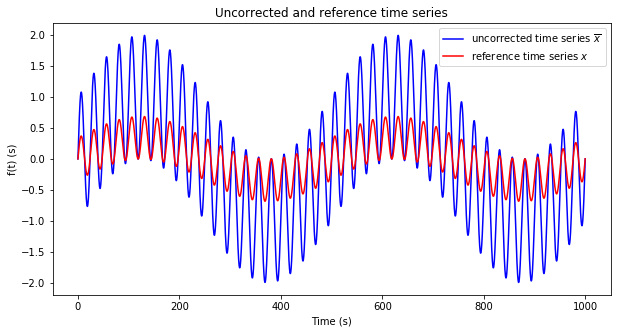

In [6]:
# Initialize Plots
plt.figure(figsize=(10,5))
    
# Plot time series
plt.plot(t, xb, 'b', label = r'uncorrected time series $\overline{x}$')
plt.plot(t, x, 'r', label = r'reference time series $x$')
plt.xlabel('Time (s)')
plt.ylabel('f(t) (s)')
plt.legend()
plt.title('Uncorrected and reference time series')

Den optimalen Skalierungsfaktor $a$ können wir einfach durch Summation über die Produkte der Zeitreihen bestimmen. 

In [7]:
a = np.sum(x*xb) / np.sum(xb*xb)
print(a)

0.34296863030456254


Anwenden des Faktors $a$ auf die unkorrigierte Zeitreihe, zeigt daß sich beide Zeitreihen perfekt überlagern lassen.

Text(0.5, 1.0, 'Corrected and reference time series')

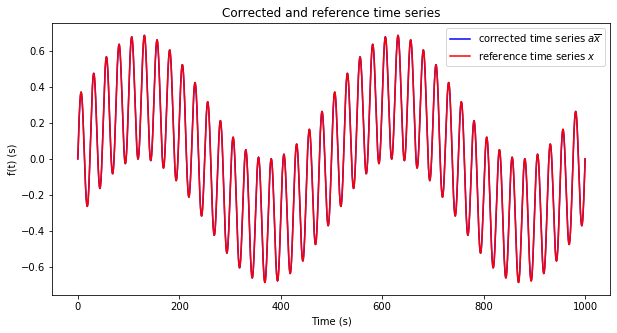

In [8]:
# Initialize Plots
plt.figure(figsize=(10,5))
    
# Plot time series
plt.plot(t, a*xb, 'b', label = r'corrected time series $a\overline{x}$')
plt.plot(t, x, 'r', label = r'reference time series $x$')
plt.xlabel('Time (s)')
plt.ylabel('f(t) (s)')
plt.legend()
plt.title('Corrected and reference time series')

### Aufgabe 4.2

Leiten Sie analog die Bestimmungsgleichung für den Faktor $a$ im Fall einer extern gemessenen Störgröße Gl. (4.11) mit Hilfe der Methode der kleinsten Quadrate her. Interpretieren Sie auch dieses Ergebnis mittels Korrelationsfunktionen.

Analog zu Aufgabe 4.1 folgt für den optimalen Skalierungsfaktor $a$ in diesem Fall:

\begin{equation}
a = \frac{\sum_{i=1}^N x_i \tilde{p}_i}{\sum_{i=1}^N \tilde{p}_i \tilde{p}_i}\notag
\end{equation}

### Aufgabe 4.3

Durch Gl. (4.15) wird ein Trend in Form eines Polynomansatzes formuliert. Leiten Sie mit Hilfe der Methode der kleinsten Quadrate die Bestimmungsgleichung für die $a_k$, $k=0,...,q,$ her.

Wir setzen Gl. (4.15)

\begin{equation}
m_i(a_j)=a_0+ a_1t_i+a_2t_i^2+\dots + a_qt_i^q = \sum\limits_{j=0}^{q} a_j t_i^j \tag{4.15}
\end{equation}

in die zu minimierende Zielfunktion (4.16) 

\begin{equation}
E=\sum\limits_{i=0}^N (x_i -m_i)^2 \rightarrow \mbox{Min.} \tag{4.16}
\end{equation}

ein und erhalten

\begin{equation}
E=\sum\limits_{i=0}^N (x_i - \sum\limits_{j=0}^{q} a_j t_i^j)^2 \notag
\end{equation}

Ableitung nach dem zu optimierenden Koeffizienten $a_k$ und nullsetzen ergibt:

\begin{equation}
\frac{\partial E}{\partial a_k} = -2 \sum\limits_{i=0}^N (x_i - \sum\limits_{j=0}^{q} a_j t_i^j) t_i^k = 0\notag
\end{equation}

Nach Division durch -2 und einigen kleinen Umformungen der Summen folgt:

\begin{equation}
\sum\limits_{i=0}^N x_i t_i^k - \sum\limits_{i=0}^N \sum\limits_{j=0}^{q} a_j t_i^j t_i^k = 0\notag
\end{equation}

Nach Verschiebung des zweiten Terms auf die RHS und vertauschen der Summationsreihenfolge, erhalten wir das gesuchte lineare Gleichungssystem zur Bestimmung der Parameter $a_k$, $k=0,...,q$:
\begin{equation}
\sum_{i=0}^N x_i t_i^k = \sum_{j=0}^q a_j \sum_{i=0}^N t_i^j t_i^k. \tag{4.18}
\end{equation}

### Aufgabe 4.4

Überprüfen Sie Ihr Ergebnis indem Sie $q=0$ setzen. Es ergibt sich eine Gleichung für die Bestimmung des Mittelwerts. Interpretieren Sie das Ergebnis: Warum ist die Schätzung des Mittelwertes optimal im Sinne kleinster Fehlerquadrate? 

Aus $q = 0$ folgt, daß auch $k=0$ sein muß. Aus (Gl. 4.18) folgt

\begin{equation}
\sum_{i=0}^N x_i t_i^0 = \sum_{j=0}^0 a_j \sum_{i=0}^N t_i^j t_i^0. \notag
\end{equation}

Mit $t_i^0 = 1$ läßt sich das Problem weiter vereinfachen

\begin{equation}
\sum_{i=0}^N x_i = \sum_{j=0}^0 a_j \sum_{i=0}^N t_i^j. \notag
\end{equation}

Berechnung der Summe $\sum_{j=0}^0$ auf der RHS ergibt

\begin{equation}
\sum_{i=0}^N x_i = a_0 \sum_{i=0}^N t_i^0. \notag
\end{equation}

Mit $\sum_{i=0}^N t_i^0 = \sum_{i=0}^N 1 = N$ folgt

\begin{equation}
\sum_{i=0}^N x_i = N a_0 \notag
\end{equation}

oder der Mittelwert

\begin{equation}
a_0 = \frac{1}{N} \sum_{i=0}^N x_i. \notag
\end{equation}

D.h. die beste Anpassung eines konstaten Koeffizieten an eine Zeitreihe ergibt deren arithmetischen Mittelwert.

Setzen wir unser Ergebnis in Gl. (4.16) ein

\begin{equation}
E=\sum\limits_{i=0}^N (x_i -m_i)^2 \rightarrow \mbox{Min.} \tag{4.16}
\end{equation}

so ergibt sich 

\begin{equation}
E=\sum\limits_{i=0}^N (x_i - a_0)^2=\sum\limits_{i=0}^N (x_i - \frac{1}{N} \sum_{j=0}^N x_j)^2 \rightarrow \mbox{Min.} \notag
\end{equation}

D.h. bis auf einen Faktor $1/(N-1)$ minimieren wir mit der Zielfunktion effektiv die Varianz zwischen den Werten der Zeitreihe $x_i$ und dem Mittelwert $a_0$.

### Aufgabe 4.5

Zeigen Sie, dass eine zweiseitige gleitende Mittelung einer Faltung mit einer Boxcar-Funktion entspricht. Wie ändert sich das Spektrum der beobachteten Wertereihe
durch die gleitende Mittelung?

Wir definieren die diskrete Boxcar-Funktion als 

\begin{equation}
boxcar_i := 
\begin{cases}
\frac{1}{2q+1}\; \text{für} -q <= i <= q \\
0\; \text{sonst}
\end{cases}
\notag
\end{equation}

Die Faltung der Boxcar Funktion mit einer Zeitreihe $x_i$ ergibt

\begin{equation}
(boxcar * x)_i = \sum_{j=-\infty}^{\infty} boxcar_j x_{i-j}\notag
\end{equation}

oder nach einsetzen der Boxcar-Funktion und einigen kleinen Umformungen folgt sofort

\begin{equation}
(boxcar * x)_i = \sum_{j=-q}^{q} \frac{1}{2q+1} x_{i-j} = \frac{1}{2q+1}\sum_{j=-q}^{q} x_{i-j} = \hat{m}_i,\notag 
\end{equation}

d.h. die diskrete Faltung der Boxcar Funktion mit der Zeitreihe entspricht dem zweiseitigen, gleitenden Mittelung $\hat{m}_i$.

Zur Berechnung des Einflußes gleitenden Mittelung auf das Spektrum der Zeitreihe $x_i$, berechnen wir die diskrete Fouriertransformation der Boxcar Funktion:

\begin{equation}
DFT(boxcar)(\omega) = \sum_{m=-\infty}^{\infty} boxcar_m e^{-i \omega m} \notag
\end{equation}

Einsetzen der Definition der Boxcar Funktion ergibt 

\begin{equation}
DFT(boxcar)(\omega) = \frac{1}{2q+1}\sum_{m=-q}^{q}e^{-i \omega m} \notag
\end{equation}

Die Summe auf der RHS entspricht einer [geometrischen Reihe](https://de.wikipedia.org/wiki/Geometrische_Reihe), für die wir folgende Identität nutzen können:

\begin{equation}
\sum_{m=-q}^{q} a^m = \frac{a^{-q}+a^{q+1}}{1-a} \notag
\end{equation}

Mit $a = e^{-i \omega}$ folgt

\begin{equation}
DFT(boxcar)(\omega) = \frac{1}{2q+1} \frac{e^{i q \omega}-e^{-i\omega(q+1)}}{1-e^{-i\omega}} \notag
\end{equation}

Schreiben wir eine Funktion zur Berechnung der DFT der Boxcar-Funktion ...

In [9]:
def box_spec(q):
    
    # Define parameters
    wmax = np.pi           # maximum frequency [rad/s]
    dw = wmax / 1000       # sample interval in frequency domain [rad/s]
    

    # Define frequency array ...
    w = np.arange(dw,wmax+dw,dw)
    
    # Compute DFT of boxcar function
    # two-sided boxcar function
    DFT = 1./(2*q+1) * (np.exp(1j*q*w)-np.exp(-1j*(q+1)*w)) / (1-np.exp(-1j*w))
    
    # one-sided boxcar function
    #DFT = 1./(q+1) * (1-np.exp(-1j*(q+1)*w)) / (1-np.exp(-1j*w))
    
    return w, DFT

... können wir die Amplitudenspektren für unterschiedliche Fensterlägen plotten.

Text(0.5, 1.0, 'Amplitude Spectra of Boxcar Functions with variable window length')

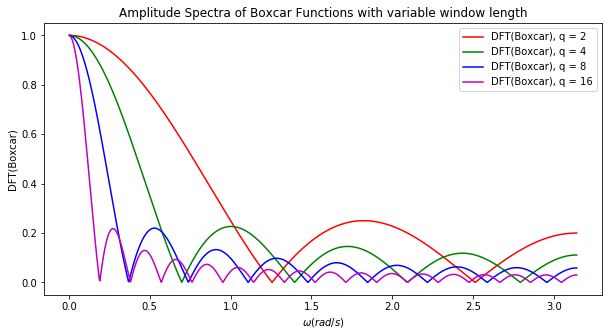

In [10]:
# compute Boxcar DFT for different window lengths
w, DFT2 = box_spec(2)
w, DFT4 = box_spec(4)
w, DFT8 = box_spec(8)
w, DFT16 = box_spec(16)

# Initialize Plots
plt.figure(figsize=(10,5))
    
# Plot time series
plt.plot(w, np.abs(DFT2), 'r', label = r'DFT(Boxcar), q = 2')
plt.plot(w, np.abs(DFT4), 'g', label = r'DFT(Boxcar), q = 4')
plt.plot(w, np.abs(DFT8), 'b', label = r'DFT(Boxcar), q = 8')
plt.plot(w, np.abs(DFT16), 'm', label = r'DFT(Boxcar), q = 16')
plt.xlabel(r'$\omega (rad/s)$')
plt.ylabel('DFT(Boxcar)')
plt.legend()
plt.title('Amplitude Spectra of Boxcar Functions with variable window length')

Alle Boxcar-Filter wirken wie ein Tiefpass-Filter, wobei diese mit zunehmender Fensterlänge engbandiger werden. Allerdings ist die Filterung nicht perfekt, da auch sehr viele hohe Frequenzen durchgelassen werden.

### Aufgabe 4.6

Definieren Sie eine Wertereihe $x_i = m_i + n_i$. Die Länge soll 200 s und der Abtastschritt 1 s sein. $n_i$ sollen normalverteilte Zufallsgrößen sein. Nehmen Sie für den Trend das Modell $m_i = \frac{0.0001}{\mbox{s}} t_i^2$ an. Führen Sie eine Trendkorrektur mit einem Polynomansatz durch.

- Die Ordnung für die Trendkorrektur soll 1 und die Standardabweichung für das zufällige Rauschen soll ebenfalls 1 sein.

- Die Ordnung für die Trendkorrektur soll 1 und die Standardabweichung für das zufällige Rauschen soll 0.1 sein.

- Die Ordnung für die Trendkorrektur soll 2 und die Standardabweichung für das zufällige Rauschen soll 1 sein.

- Die Ordnung für die Trendkorrektur soll 2 und die Standardabweichung für das zufällige Rauschen soll 0.1 sein.

Interpretieren Sie die Ergebnisse.

Zur Lösung dieser Aufgabe müssen wir optimale Koeffizienten für Polynomansätze 1. und 2. Grades finden. Dazu nutzen wir das lineare Gleichungssystem (4.18) zur Bestimmung der Parameter $a_k$, $k=0,...,q$:
\begin{equation}
\sum_{i=0}^N x_i t_i^k = \sum_{j=0}^q a_j \sum_{i=0}^N t_i^j t_i^k. \tag{4.18}
\end{equation}

##### Polynomansatz mit Grad 1 (q=1)

Mit (4.18) ergibt sich das Gleichungssystem für $k = 0$ und $q = 1$ zu

\begin{equation}
\sum_{i=0}^N x_i t_i^0 = \sum_{j=0}^1 a_j \sum_{i=0}^N t_i^j t_i^0. \notag
\end{equation}

Mit $t_i^0 = 1$ folgt

\begin{equation}
\sum_{i=0}^N x_i = a_0 \sum_{i=0}^N t_i^0 t_i^0 + a_1 \sum_{i=0}^N t_i^1 t_i^0 \notag
\end{equation}

oder 

\begin{equation}
\sum_{i=0}^N x_i = N a_0 + a_1 \sum_{i=0}^N t_i \tag{E1}
\end{equation}

Für $k=1$ und $q=1$ folgt aus Gl. (4.18)

\begin{equation}
\sum_{i=0}^N x_i t_i^1 = \sum_{j=0}^1 a_j \sum_{i=0}^N t_i^j t_i^1 \notag
\end{equation}

nach Ausführung der Summe $\sum_{j=0}^1$ auf der RHS

\begin{equation}
\sum_{i=0}^N x_i t_i = a_0 \sum_{i=0}^N t_i^0 t_i + a_1 \sum_{i=0}^N t_i^1 t_i\notag
\end{equation}

oder 

\begin{equation}
\sum_{i=0}^N x_i t_i = a_0 \sum_{i=0}^N t_i + a_1 \sum_{i=0}^N t_i^2\tag{E2}
\end{equation}

Die Gl. (E1) und (E2) bilden ein lineares Gleichungssystem:

\begin{equation}
N a_0 + a_1 \sum_{i=0}^N t_i = \sum_{i=0}^N x_i\tag{E1}
\end{equation}

\begin{equation}
a_0 \sum_{i=0}^N t_i + a_1 \sum_{i=0}^N t_i^2 = \sum_{i=0}^N x_i t_i\tag{E2}
\end{equation}

welches wir explizit nach den Koeffizienten $a_0$ und $a_1$ auflösen könnten, oder wir schreiben das Gleichungssystem als Matrix-Vektorgleichung:

\begin{equation}
\begin{pmatrix} N & \sum_{i=0}^N t_i \\ \sum_{i=0}^N t_i & \sum_{i=0}^N t_i^2 \end{pmatrix} 
\begin{pmatrix} a_0  \\ a_1 \end{pmatrix} =
\begin{pmatrix} \sum_{i=0}^N x_i \\ \sum_{i=0}^N x_i t_i \end{pmatrix}
\notag
\end{equation}

oder 

\begin{equation}
M a = b,
\notag
\end{equation}

aus der wir die Koeffizienten über

\begin{equation}
a = M^{-1}b, 
\notag
\end{equation}

bestimmen können, wobei $M^{-1}$ die inverse Matrix der Matrix $M$ bezeichnet, welche wir einfach in Python berechnen können.

##### Polynomansatz mit Grad 2 (q=2)

Analog zu dem linearen Fall $q=1$ ergibt sich für den quadratischen Trend $q=2$ folgendes lineares Gleichungssystem für die optimalen Koeffizienten $a_0,a_1,a_2$:

\begin{equation}
\begin{pmatrix} N & \sum_{i=0}^N t_i & \sum_{i=0}^N t_i^2\\ \sum_{i=0}^N t_i & \sum_{i=0}^N t_i^2 & \sum_{i=0}^N t_i^3 \\
\sum_{i=0}^N t_i^2 & \sum_{i=0}^N t_i^3 & \sum_{i=0}^N t_i^4
\end{pmatrix} 
\begin{pmatrix} a_0  \\ a_1 \\ a_2\end{pmatrix} =
\begin{pmatrix} \sum_{i=0}^N x_i \\ \sum_{i=0}^N x_i t_i \\ \sum_{i=0}^N x_i t_i^2\end{pmatrix}
\notag
\end{equation}

Jetzt können wir die Aufgabe in Python implementieren ...

In [11]:
def trend_corr(q,sn):
    
    # Define parameters
    dt = 1.                 # time sampling [s]
    L = 200.                # length of the time series [s]

    # Define time array
    t = np.arange(0,L+dt,dt) # compute time vector
    N = len(t)
    
    # Create trend ...
    m = 0.0001 * t**2
    
    # ... create normal random noise with standard deviation sn ...
    # Here I set a fixed seed to reproduce the same random numbers every time 
    # I change the parameters sn, wsta, wlta, wk, kurtosis, so the time series 
    # does not change. THIS IS A VERY BAD PRACTICE: DON'T DO THIS IF
    # IF YOUR APPLICATION HAS TO RELY ON RANDOM NUMBERS
    np.random.seed(seed=12345656)
    xnoise = np.random.normal(0., sn, N)
    
    # ... add random noise to trend
    x = m + xnoise
    
    # compute linear trend (q=1)
    if(q==1):
        
        # assemble matrix M
        M = np.matrix([[N, np.sum(t)], [np.sum(t), np.sum(t**2)]])
        
        # assemble vector b
        b = np.matrix([[np.sum(x)],[np.sum(x*t)]])
        
        # compute inverse of M and solve for optimum coefficients a
        a = np.linalg.inv(M)*b
        
        # create trend
        mopt = (float)(a[0]) + (float)(a[1]) * t
    
    # compute quadratic trend (q=2)
    if(q==2):
        
        # assemble matrix M
        M = np.matrix([[N, np.sum(t), np.sum(t**2)], 
                       [np.sum(t), np.sum(t**2), np.sum(t**3)],
                       [np.sum(t**2),np.sum(t**3),np.sum(t**4)]])
        
        # assemble vector b
        b = np.matrix([[np.sum(x)],[np.sum(x*t)],[np.sum(x*t**2)]])
        
        # compute inverse of M and solve for optimum coefficients a
        a = np.linalg.inv(M)*b
        
        # create trend
        mopt = (float)(a[0]) + (float)(a[1]) * t + (float)(a[2]) * t**2
        
    
    # Initialize Plots
    plt.figure(figsize=(20,10))
    
    plt.subplot(211)
    
    # Plot time series
    plt.plot(t, x, 'b', label = r'time series x = m + xnoise')
    if(q==1):
        plt.plot(t, mopt, 'r', label = r'linear trend (q=1)')
    if(q==2):
        plt.plot(t, mopt, 'r', label = r'quadratic trend (q=2)')    
    plt.xlabel('Time (s)')
    plt.ylabel('x(t) (s)')
    plt.legend()
    
    # Apply Dickey-Fuller test to uncorrected time series x
    res = adfuller(x)
    
    title = 'x = Noise + Trend, Dickey-Fuller Test p-value = ' + str(res[1])
    plt.title(title)
    
    plt.subplot(212)
    
    # Plot time series
    if(q==1):
        plt.plot(t, x-mopt, 'r', label = r'x - linear trend (q=1)')
    if(q==2):
        plt.plot(t, x-mopt, 'r', label = r'x - quadratic trend (q=2)')    
    plt.xlabel('Time (s)')
    plt.ylabel('x(t) (s)')
    plt.legend()
    
     # Apply Dickey-Fuller test to uncorrected time series x
    res1 = adfuller(x-mopt)
    
    title = 'Trendcorrected time series, Dickey-Fuller Test p-value = ' + str(res1[1])
    plt.title(title)

In [12]:
interactive_plot = interactive(trend_corr, q=(1, 2, 1), sn=(.1, 1, .1) )
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=1, description='q', max=2, min=1), FloatSlider(value=0.5, description='s…

Bei großen Noiseamplituden kann der Trend der Zeitreihe sowohl durch eine lineare als auch quadratische Funktion angepasst werden. Bei kleinen Noiseamplituden, erlaubt dagegen nur der quadratische Test eine erfolgreiche Anpassung. Dies wird durch die p-Werte des Dickey-Fuller Tests unterstützt.  

### Aufgabe 4.7

Für das Modell der vorangegangenen Aufgabe soll die Trendkorrektur mit einer zweiseitigen gleitenden Mittelung durchgeführt werden. Die Standardabweichung des zufälligen Rauschens soll 1 bzw. 0.1 sein. Wählen sie die Länge des gleitenden Fensters sinnvoll.

In [13]:
def trend_corr_mov(q,sn):
    
    # Define parameters
    dt = 1.                 # time sampling [s]
    L = 200.                # length of the time series [s]

    # Define time array
    t = np.arange(0,L+dt,dt) # compute time vector
    N = len(t)
    
    # Create trend ...
    m = 0.0001 * t**2
    
    # ... create normal random noise with standard deviation sn ...
    # Here I set a fixed seed to reproduce the same random numbers every time 
    # I change the parameters sn, wsta, wlta, wk, kurtosis, so the time series 
    # does not change. THIS IS A VERY BAD PRACTICE: DON'T DO THIS IF
    # IF YOUR APPLICATION HAS TO RELY ON RANDOM NUMBERS
    np.random.seed(seed=12345656)
    xnoise = np.random.normal(0., sn, N)
    
    # ... add random noise to trend
    x = m + xnoise
    
    # compute trend using a two-sided moving average
    box = np.zeros(N)     # initialize boxcar function
    nbox = (int)(q // dt) # compute window length in time samples
    box[:nbox] = 1. / nbox       # define boxcar function
    
    # compute moving average by convolution of boxcar with time series
    mopt = np.convolve(box,x)
    mopt = mopt[:N]   # use only positive lags
    
    # Initialize Plots
    plt.figure(figsize=(20,10))
    
    plt.subplot(211)
    
    # Plot time series
    plt.plot(t, x, 'b', label = r'time series x = m + xnoise')
    plt.plot(t, mopt, 'r', label = r'moving average trend')    
    plt.xlabel('Time (s)')
    plt.ylabel('x(t) (s)')
    plt.legend()
    
    # Apply Dickey-Fuller test to uncorrected time series x
    res = adfuller(x)
    
    title = 'x = Noise + Trend, Dickey-Fuller Test p-value = ' + str(res[1])
    plt.title(title)
    
    plt.subplot(212)
    
    # Plot time series
    plt.plot(t, x-mopt, 'r', label = r'x - moving average')
    plt.xlabel('Time (s)')
    plt.ylabel('x(t) (s)')
    plt.legend()
    
     # Apply Dickey-Fuller test to uncorrected time series x
    res1 = adfuller(x-mopt)
    
    title = 'Trendcorrected time series, Dickey-Fuller Test p-value = ' + str(res1[1])
    plt.title(title)

In [14]:
interactive_plot = interactive(trend_corr_mov, q=(2, 200, 10), sn=(.1, 1, .1) )
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=92, description='q', max=200, min=2, step=10), FloatSlider(value=0.5, de…

Abhängig von der Noiseamplitude muß man die Fensterlänge anpassen, damit sich möglichst kleine p-Werte beim Dickey-Fuller Test ergeben. Wählt man eine zu große Fensterlänge, nähert sich das gleitende Mittel dem arithmetischen Mittelwert der Zeitreihe.

### Aufgabe 4.8

Definieren Sie eine Funktion $\cos(\omega_1 t) + 0.4 \cos(\omega_2 t)$ im Intervall $(0 s, 60 s)$ für $\omega_1 = \frac{2 \pi}{20 s}$, $\omega_2 = \frac{2\pi}{1 s}$ mit einem Abtastschritt von $\Delta t = 0.1 s$. Ändern Sie den Abtastschritt auf 4 s. Nutzen Sie die Matlab-Funktion `resample`. Berechnen Sie die Wertereihe auch für einen Abtastschritt von 4 s. Vergleichen und interpretieren Sie die Ergebnisse.

Das Problem läßt sich einfach in Python implementieren, z.B. mit der `SciPy` Funktion [resample](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html).

In [15]:
from scipy import signal

In [16]:
def cos_resamp(dtnew):

    # Define parameters
    L = 60.                # length of the time series [s]
    dt = .1                # time sampling [s]

    omega1 = 2. * np.pi / 20. # circular frequency 1
    omega2 = 2. * np.pi / 1. # circular frequency 2

    # Define cos functions ...
    t = np.arange(dt,L+dt,dt)                     # compute time vector   
    x = np.cos(omega1*t) + .4 * np.cos(omega2*t)  # compute time series

    # Compute new time vector with sample interval dtnew
    tnew = np.arange(dtnew,L+dtnew,dtnew)    # compute time vector   
    Nnew = len(tnew)                         # new number of time samples
    
    # Resample time series
    xnew = signal.resample(x, Nnew)
    #xnew = np.interp(tnew,t,x)
    
    # Initialize Plots
    plt.figure(figsize=(10,5))
    
    # Plot time series
    plt.plot(t, x, 'b', label = r'x(t), dt = .1 s')
    label = r'$x_{new}(t),\; dt_{new} = $' + str(dtnew) + ' s'
    plt.plot(tnew, xnew, 'r', label = label)
    plt.xlabel(r'Time [s]')
    plt.ylabel(r'$\cos(\omega_1 t) + 0.4 \cos(\omega_2 t)$')
    plt.legend(loc='upper right')
    title = 'Resampling of time series x(t) from dt = .1 s to dtresamp = ' + str(dtnew) + ' s' 
    plt.title(title)
    
    print('len(tnew) = ', len(tnew))
    print('len(t) = ', len(t))

In [17]:
interactive_plot = interactive(cos_resamp, dtnew=(0.01, 9., 1.))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=4.01, description='dtnew', max=9.0, min=0.01, step=1.0), Output(layout…

Das Resampeln der Zeitreihe funktioniert für kleine Vergrößerungen des Sampleintervalls. Größere Sampleintervalle führen zu Aliasing in der resampelten Zeitreihe.

### Aufgabe 4.9

Definieren Sie eine Funktion $e^{-\alpha t} \sin(\omega_0 t)$ im Intervall $(0 s, 40 s)$ für $\omega_0 = \frac{2 \pi}{20 s}$, $\Delta t = 2 s$ und $\alpha = \frac{1}{20 s}$. Berechnen Sie das Amplitudenspektrum und stellen Sie es graphisch dar. Hängen Sie im Intervall $(40 s, 120 s)$ Nullen an. Wie ändert sich das Amplitudenspektrum. Interpretieren Sie die Ergebnisse.

Um die Aufgabe zu lösen, müssen wir nur die Zeitreihe und das dazugehörige Amplitudenspektrum berechnen und plotten.

In [18]:
def resample_spec(Nzero):
    
    # Define parameters
    dt = 2.                  # time sampling [s]
    L = 40.                  # length of the time series [s]

    # Define sine function ...
    t = np.arange(0.,L+dt,dt)      # compute time vector
    
    omega = 2. * np.pi / 20.      # circular frequency of sine wave
    alpha = 1. / 20.              # damping parameter alpha in exponential function
    
    s = np.exp(-alpha*t) * np.sin(omega*t) # compute exponential damping + sine wave
    
    # Add zeros to the time series
    zeros = np.zeros(Nzero)
    s = np.hstack((s, zeros))
    
    # Compute new time vector
    N = len(s)               # length of the time series [#samples]
    t = np.arange(0.,(N*dt),dt)      # compute time vector
    
    # Fourier transform
    S = np.fft.fft(s)
    
    # Normalize by length of the time series
    S = S / (N*dt)
    
    # estimate frequencies    
    freq = np.fft.fftfreq(N, d=dt)
    
    # Initialize Plots
    plt.figure(figsize=(20,10))
    
    # Plot time series
    plt.subplot(211)
    
    plt.plot(t, s, 'r',label=r'$e^{-\alpha t}sin(\omega t)$')
    plt.legend(loc='upper right')
    plt.xlabel('Time (s)')
    plt.ylabel('s(t) (s)')
    plt.xlim(0.,np.max(t))    
    plt.title(r'Resampling of frequency domain by adding zeros')
    
    # Plot Spectrum
    plt.subplot(212)
    
    plt.plot(freq, np.abs(S), 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Amplitude |X(freq)|')
    plt.title(r'Amplitude spectrum of Time Series $s$')
    plt.xlim(0., .24)

In [19]:
interactive_plot = interactive(resample_spec, Nzero=(0, 200, 10))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=100, description='Nzero', max=200, step=10), Output(layout=Layout(height…

Das hinzufügen der Nullen am Ende der Zeitreihe verkleinert das Abtastintervall im Frequenzbereich. Allerdings fügt man effektiv eine Datenlücke in die Zeitreihe ein, was laut [Vorlesung](https://nbviewer.org/github/daniel-koehn/Geophysikalische-Signalverarbeitung/blob/master/chap_04/01_Einfluss_von_Datenluecken_auf_das_Spektrum.ipynb) zum Auftreten von Nebenmaxima im Frequenzbereich führen sollte. In diesem Beispiele sind die Nebenmaxima nicht deutlich ausgeprägt, da die Funktion exponentiell gedämpft wird, aber ansatzweise deutlich im Amplitudenspektrum sichtbar.